# Prostate Cancer

To solve the question: "What's the relationship between the TMPRSS2 gene and Prostate Cancer when considering the influence of age?"

In [1]:
import pandas as pd
import numpy as np
clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.PRAD.sampleMap_PRAD_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)

In [2]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,_GENOMIC_ID_TCGA_PRAD_PDMRNAseq,_GENOMIC_ID_TCGA_PRAD_miRNA_HiSeq,_GENOMIC_ID_TCGA_PRAD_RPPA,_GENOMIC_ID_TCGA_PRAD_gistic2,_GENOMIC_ID_TCGA_PRAD_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_PRAD_PDMRNAseqCNV,_GENOMIC_ID_data/public/TCGA/PRAD/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_PRAD_mutation_bcm_gene,_GENOMIC_ID_TCGA_PRAD_mutation_curated_broad_gene,_GENOMIC_ID_TCGA_PRAD_exp_HiSeqV2_PANCAN
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,TCGA-2A-A8VL-01,TCGA-2A-A8VL,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,51,TCGA-2A-A8VL-F71759,TCGA-2A-A8VL,...,TCGA-2A-A8VL-01,TCGA-2A-A8VL-01,1487FD23-ED22-4942-86D6-CF19837F63B9,TCGA-2A-A8VL-01A-21D-A376-01,e10fe58f-7ceb-4ad8-bce3-5ffbefc05cb5,TCGA-2A-A8VL-01,TCGA-2A-A8VL-01,NaN,TCGA-2A-A8VL-01A-21D-A377-08,e10fe58f-7ceb-4ad8-bce3-5ffbefc05cb5
TCGA-2A-A8VO-01,TCGA-2A-A8VO-01,TCGA-2A-A8VO,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,57,TCGA-2A-A8VO-F71780,TCGA-2A-A8VO,...,TCGA-2A-A8VO-01,TCGA-2A-A8VO-01,FF23B458-D1F8-4001-A8E3-7F8785435C76,TCGA-2A-A8VO-01A-11D-A376-01,20a779a3-04ab-4080-b11d-ed7b22fcd2da,TCGA-2A-A8VO-01,TCGA-2A-A8VO-01,NaN,TCGA-2A-A8VO-01A-11D-A377-08,20a779a3-04ab-4080-b11d-ed7b22fcd2da
TCGA-2A-A8VT-01,TCGA-2A-A8VT-01,TCGA-2A-A8VT,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,47,TCGA-2A-A8VT-F71798,TCGA-2A-A8VT,...,TCGA-2A-A8VT-01,TCGA-2A-A8VT-01,931CEBFB-011C-4797-8E05-8012D3ADC601,TCGA-2A-A8VT-01A-11D-A376-01,2e80aebe-77b5-496c-bde9-494b9b94ee3f,TCGA-2A-A8VT-01,TCGA-2A-A8VT-01,NaN,TCGA-2A-A8VT-01A-11D-A377-08,2e80aebe-77b5-496c-bde9-494b9b94ee3f
TCGA-2A-A8VV-01,TCGA-2A-A8VV-01,TCGA-2A-A8VV,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,52,TCGA-2A-A8VV-F71800,TCGA-2A-A8VV,...,TCGA-2A-A8VV-01,TCGA-2A-A8VV-01,443A2276-226E-4D27-936C-3B25B14E7121,TCGA-2A-A8VV-01A-11D-A376-01,45eca81f-9ce2-4de6-b970-65959d76398c,TCGA-2A-A8VV-01,TCGA-2A-A8VV-01,NaN,TCGA-2A-A8VV-01A-11D-A377-08,45eca81f-9ce2-4de6-b970-65959d76398c
TCGA-2A-A8VX-01,TCGA-2A-A8VX-01,TCGA-2A-A8VX,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,70,TCGA-2A-A8VX-F71804,TCGA-2A-A8VX,...,TCGA-2A-A8VX-01,TCGA-2A-A8VX-01,1A003DC8-7045-4F90-A768-F2E88FE31242,TCGA-2A-A8VX-01A-11D-A376-01,0ff237d2-9283-44c7-bfae-c2020c73b94c,TCGA-2A-A8VX-01,TCGA-2A-A8VX-01,NaN,NaN,0ff237d2-9283-44c7-bfae-c2020c73b94c


In [3]:
gene_data.head()

,TCGA-XJ-A83F-01,TCGA-G9-6348-01,TCGA-CH-5766-01,TCGA-EJ-A65G-01,TCGA-G9-6354-01,TCGA-EJ-5527-01,TCGA-HC-8213-01,TCGA-Y6-A9XI-01,TCGA-EJ-7125-11,TCGA-CH-5744-01,...,TCGA-HC-A6AP-01,TCGA-EJ-7317-01,TCGA-YL-A8S9-01,TCGA-KK-A8IA-01,TCGA-G9-6356-01,TCGA-YL-A8SO-01,TCGA-J4-A67Q-01,TCGA-KK-A6E4-01,TCGA-KK-A7B0-01,TCGA-EJ-5511-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.508592,-0.991092,-1.305892,-0.655492,-0.812592,-1.094092,-1.309592,-0.776192,-1.374692,-0.419892,...,0.125308,-0.032392,-0.359992,-0.956392,-0.217392,-0.661192,-0.174092,-1.288292,-0.155192,-0.597492
HIF3A,-0.403026,0.350174,-0.583126,1.224774,-0.203626,0.043074,-1.760026,-0.800826,1.367774,-0.698226,...,1.855274,0.802274,-2.286126,-0.656726,0.810974,0.291574,3.075474,-0.107326,0.543874,0.259674
RNF17,-0.531035,-0.130235,0.226365,-0.531035,-0.531035,2.024365,-0.531035,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.105435,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.688028,0.576228,0.517428,0.192528,0.819728,0.020728,0.627928,0.457128,-0.214872,0.588328,...,0.317228,0.500528,-0.038372,0.363228,0.402928,0.751828,0.271328,0.145228,0.722628,0.130728
RNF11,0.159522,0.566922,1.018822,0.346722,0.394322,0.736222,0.456522,0.717622,1.105822,0.418322,...,-0.142478,0.297922,0.210822,0.288122,0.125422,0.313122,-0.021078,-0.730078,-1.095478,-0.108478


In [4]:
# Set Basic info
gene_fullname = 'TP53 gene'
gene = 'tp53'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Prostate Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 104 features, and the gene dataset includes 20530 genes


In [5]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,TCGA-2A-A8VL-01,TCGA-2A-A8VL,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,51,TCGA-2A-A8VL-F71759,TCGA-2A-A8VL,...,-0.149678,-0.565717,-1.980333,-1.28139,-0.440177,1.163814,-1.480327,-0.571195,1.802067,1.151488
TCGA-2A-A8VO-01,TCGA-2A-A8VO-01,TCGA-2A-A8VO,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,57,TCGA-2A-A8VO-F71780,TCGA-2A-A8VO,...,1.122422,0.731283,-1.019233,-1.28139,-0.325877,0.675314,-0.336327,-0.120095,2.618067,0.785288
TCGA-2A-A8VT-01,TCGA-2A-A8VT-01,TCGA-2A-A8VT,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,47,TCGA-2A-A8VT-F71798,TCGA-2A-A8VT,...,-0.748878,-0.282217,-1.477333,-1.28139,-1.004377,-0.853486,-0.619527,-0.764495,1.723367,0.400188
TCGA-2A-A8VV-01,TCGA-2A-A8VV-01,TCGA-2A-A8VV,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,52,TCGA-2A-A8VV-F71800,TCGA-2A-A8VV,...,-0.748878,-0.630117,-1.643033,-1.28139,-0.389677,0.959814,-1.920727,-0.447995,2.168967,0.419888
TCGA-2A-A8VX-01,TCGA-2A-A8VX-01,TCGA-2A-A8VX,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,70,TCGA-2A-A8VX-F71804,TCGA-2A-A8VX,...,0.579622,-0.998517,-2.466333,-1.28139,-0.421977,0.017714,-3.027827,-1.182695,-0.682033,0.891288


In [6]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,-18658.0,-0.529292,1.057174,-0.531035,0.618328,0.190622,0.81449,0.190406,0.636354,-0.423399,...,-0.149678,-0.565717,-1.980333,-1.28139,-0.440177,1.163814,-1.480327,-0.571195,1.802067,1.151488
TCGA-2A-A8VO-01,-20958.0,-0.758992,1.607474,-0.531035,0.457328,-0.006778,0.08739,0.116506,0.655854,-0.423399,...,1.122422,0.731283,-1.019233,-1.28139,-0.325877,0.675314,-0.336327,-0.120095,2.618067,0.785288
TCGA-2A-A8VT-01,-17365.0,-0.205792,-0.895626,-0.531035,0.330028,0.326922,0.00119,0.008406,-0.469046,0.371801,...,-0.748878,-0.282217,-1.477333,-1.28139,-1.004377,-0.853486,-0.619527,-0.764495,1.723367,0.400188
TCGA-2A-A8VV-01,-19065.0,-0.697292,1.133574,-0.531035,0.807328,-0.273778,0.17979,0.243206,-0.175046,-0.423399,...,-0.748878,-0.630117,-1.643033,-1.28139,-0.389677,0.959814,-1.920727,-0.447995,2.168967,0.419888
TCGA-2A-A8VX-01,-25904.0,-0.847392,1.244074,-0.531035,0.677428,0.161422,0.57909,0.142406,-1.165446,0.165201,...,0.579622,-0.998517,-2.466333,-1.28139,-0.421977,0.017714,-3.027827,-1.182695,-0.682033,0.891288


In [7]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Prostate Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,-18658.0,-0.529292,1.057174,-0.531035,0.618328,0.190622,0.81449,0.190406,0.636354,-0.423399,...,-0.565717,-1.980333,-1.28139,-0.440177,1.163814,-1.480327,-0.571195,1.802067,1.151488,1
TCGA-2A-A8VO-01,-20958.0,-0.758992,1.607474,-0.531035,0.457328,-0.006778,0.08739,0.116506,0.655854,-0.423399,...,0.731283,-1.019233,-1.28139,-0.325877,0.675314,-0.336327,-0.120095,2.618067,0.785288,1
TCGA-2A-A8VT-01,-17365.0,-0.205792,-0.895626,-0.531035,0.330028,0.326922,0.00119,0.008406,-0.469046,0.371801,...,-0.282217,-1.477333,-1.28139,-1.004377,-0.853486,-0.619527,-0.764495,1.723367,0.400188,1
TCGA-2A-A8VV-01,-19065.0,-0.697292,1.133574,-0.531035,0.807328,-0.273778,0.17979,0.243206,-0.175046,-0.423399,...,-0.630117,-1.643033,-1.28139,-0.389677,0.959814,-1.920727,-0.447995,2.168967,0.419888,1
TCGA-2A-A8VX-01,-25904.0,-0.847392,1.244074,-0.531035,0.677428,0.161422,0.57909,0.142406,-1.165446,0.165201,...,-0.998517,-2.466333,-1.28139,-0.421977,0.017714,-3.027827,-1.182695,-0.682033,0.891288,1


In [8]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

# 2. Preliminary analysis

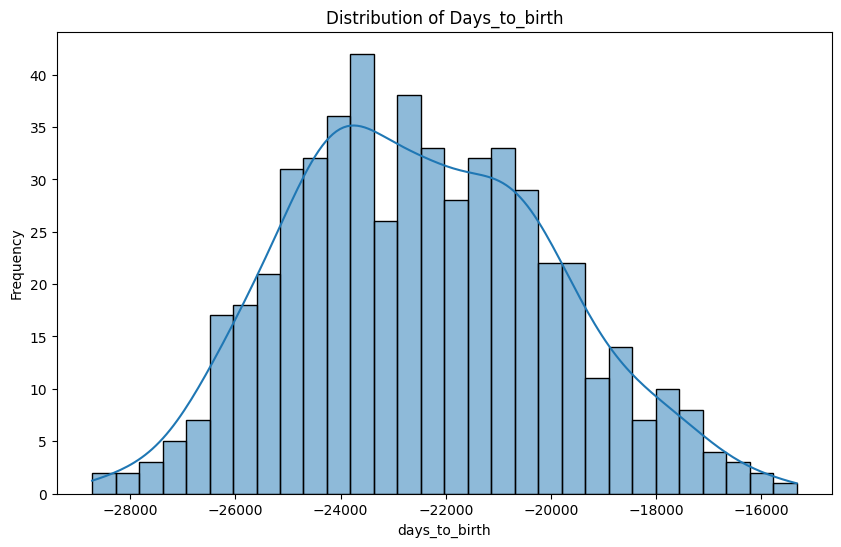

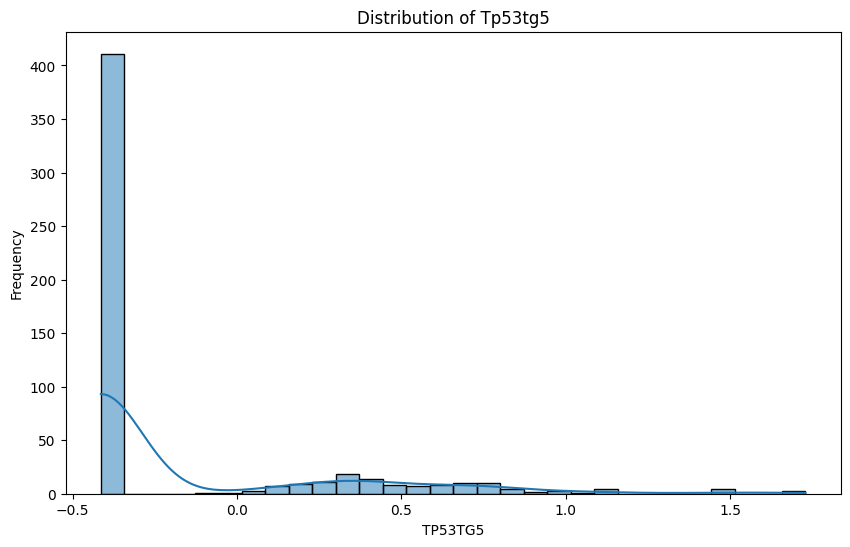

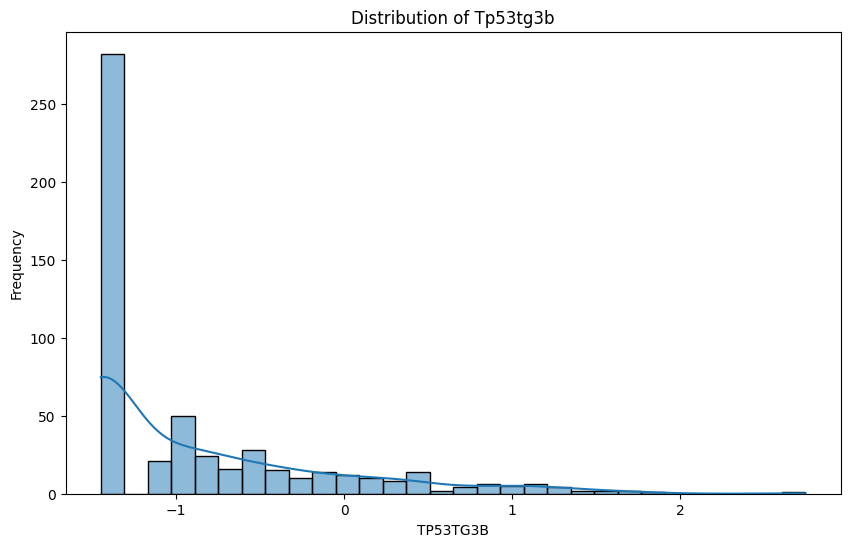

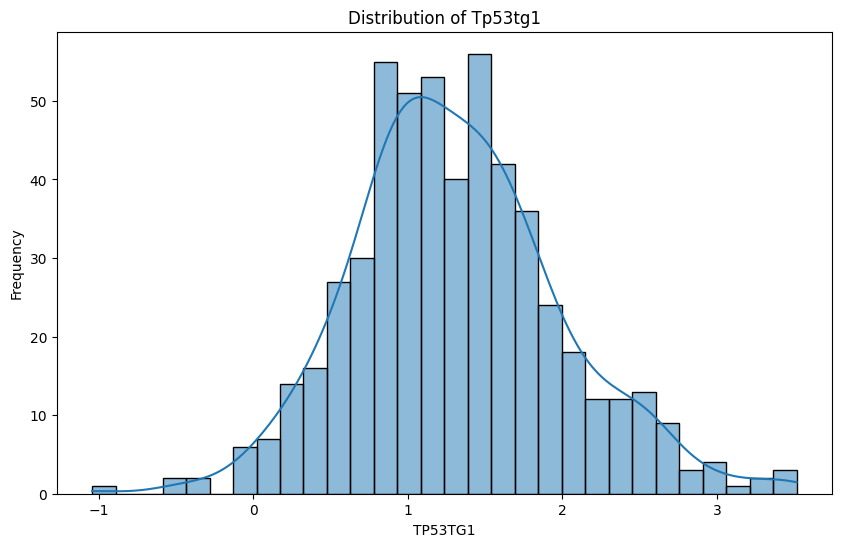

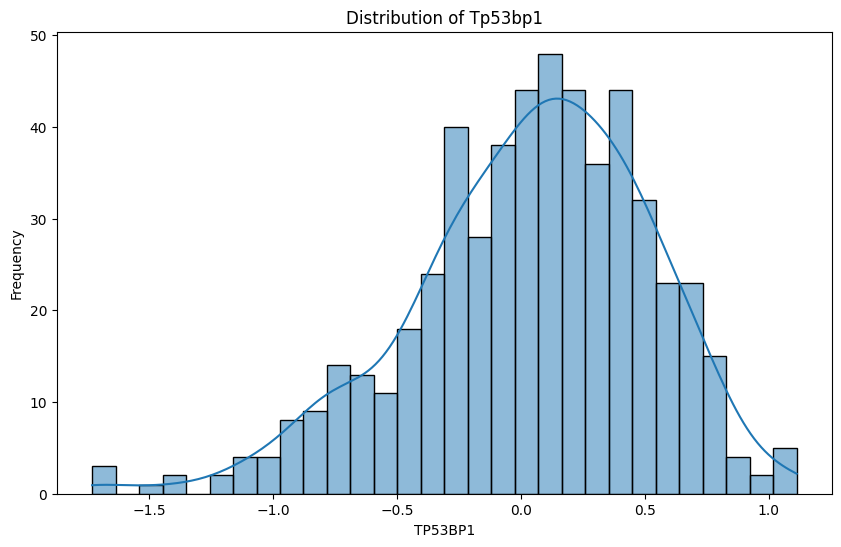

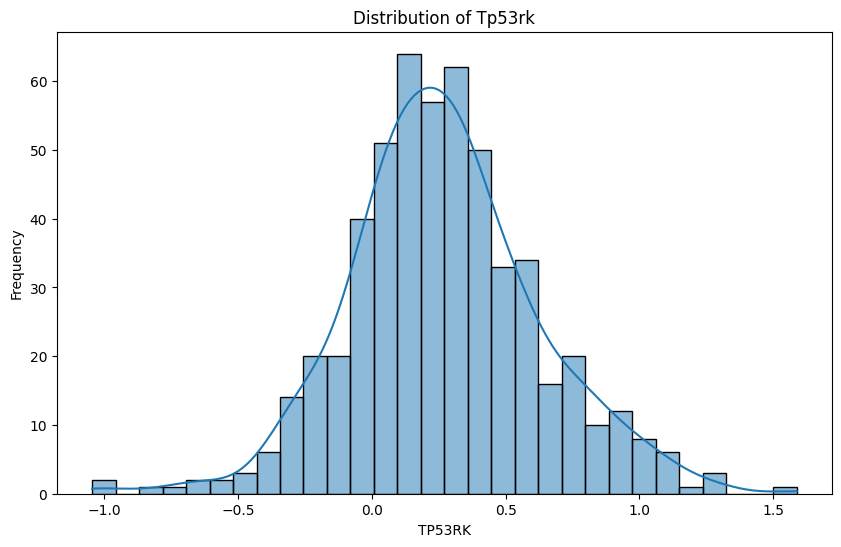

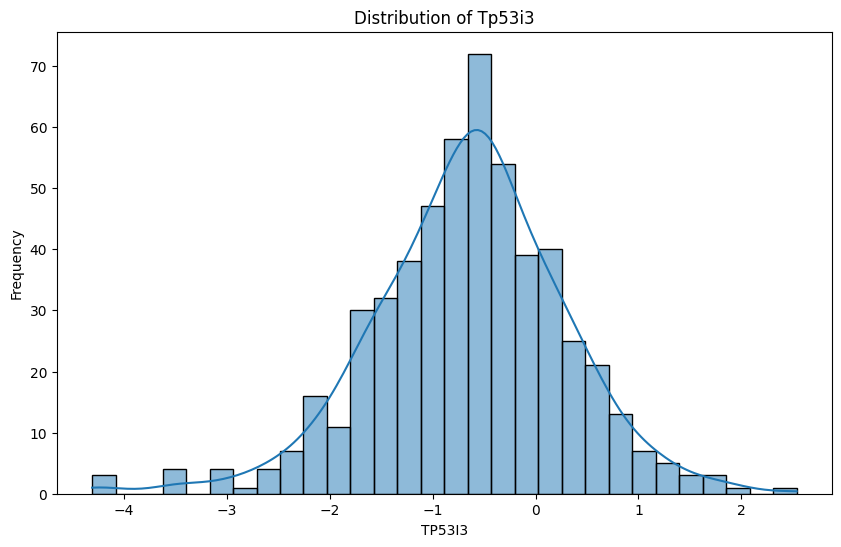

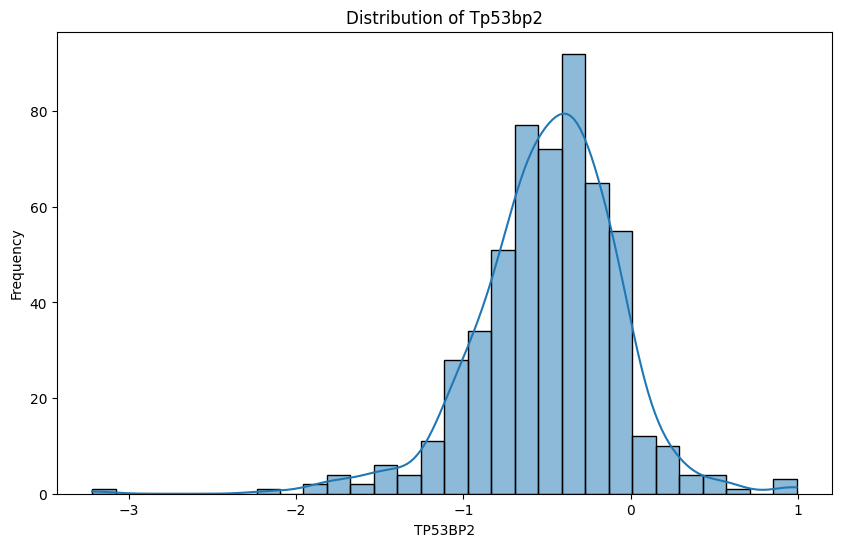

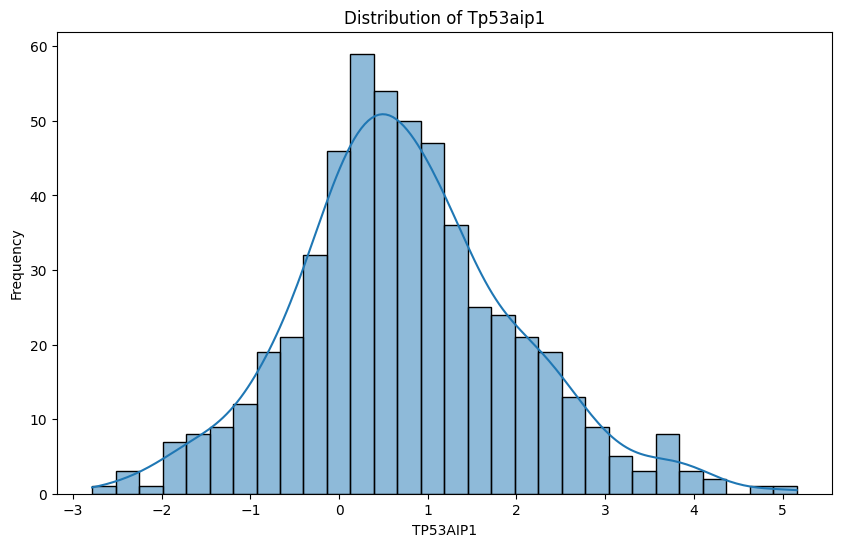

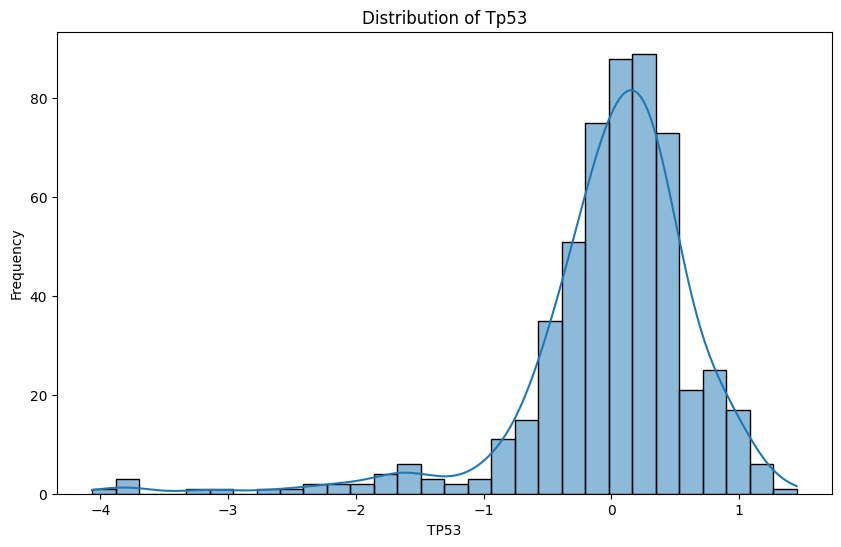

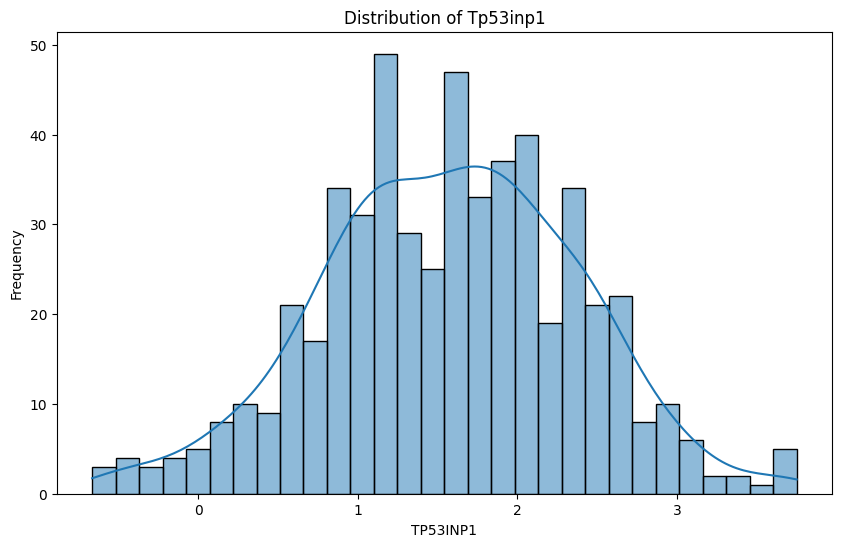

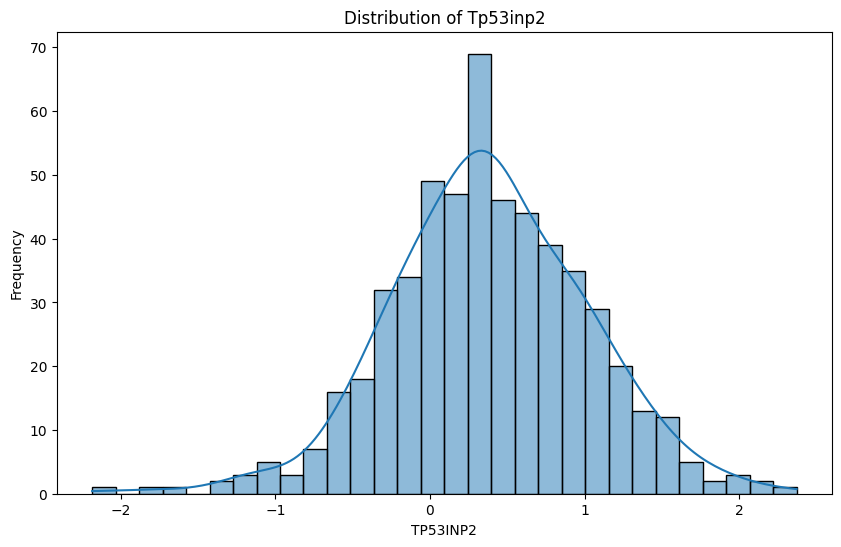

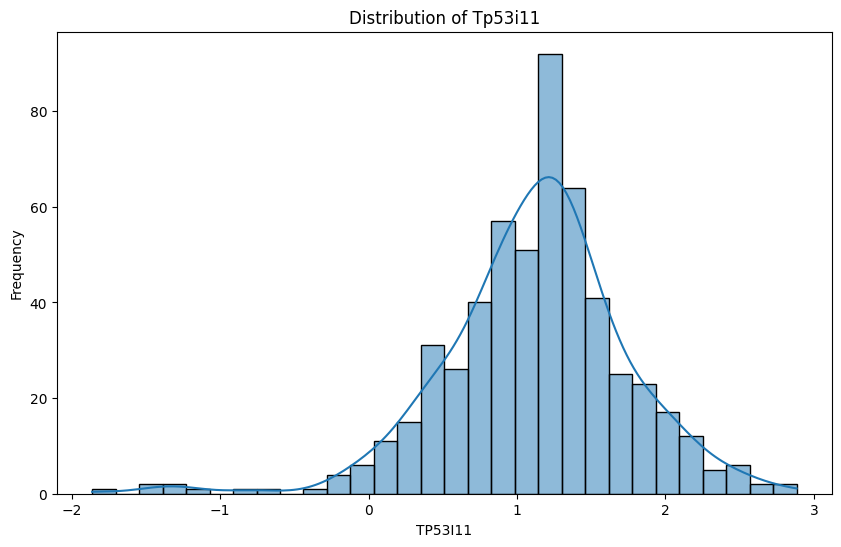

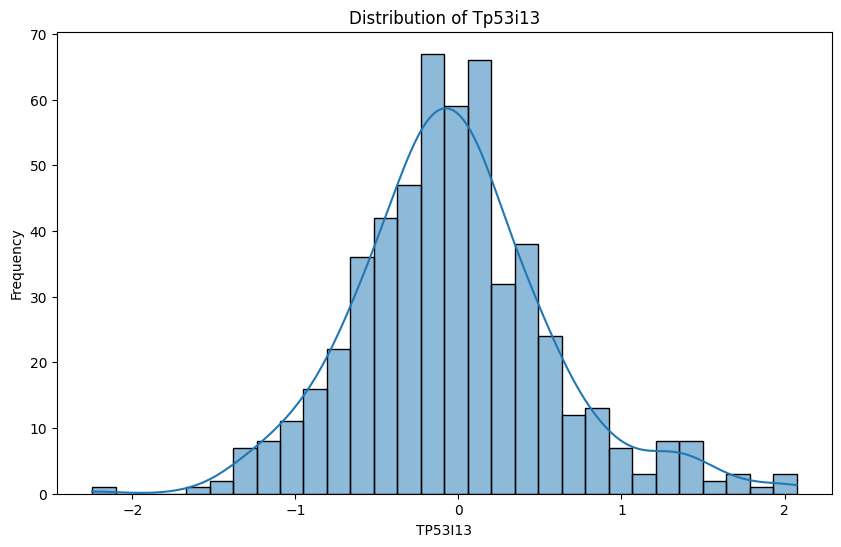

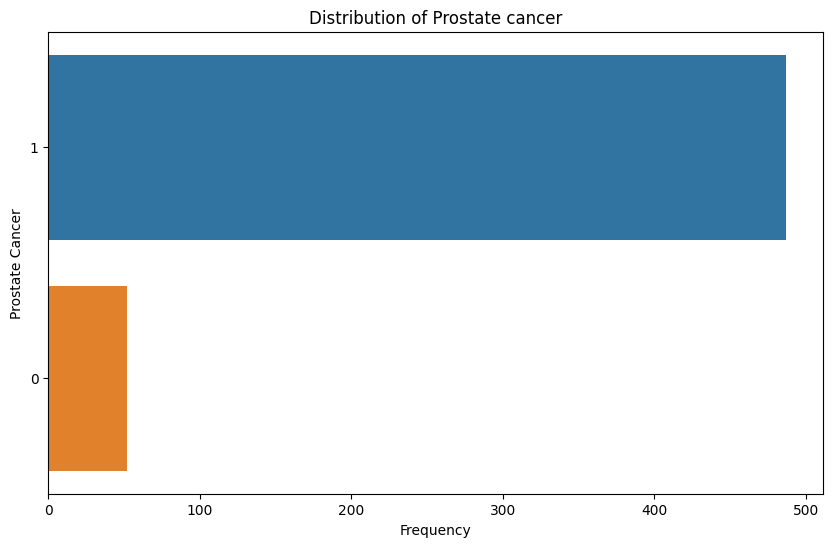

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

In [10]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Prostate Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,51,-0.529292,1.057174,-0.531035,0.618328,0.190622,0.81449,0.190406,0.636354,-0.423399,...,-0.565717,-1.980333,-1.28139,-0.440177,1.163814,-1.480327,-0.571195,1.802067,1.151488,1
TCGA-2A-A8VO-01,57,-0.758992,1.607474,-0.531035,0.457328,-0.006778,0.08739,0.116506,0.655854,-0.423399,...,0.731283,-1.019233,-1.28139,-0.325877,0.675314,-0.336327,-0.120095,2.618067,0.785288,1
TCGA-2A-A8VT-01,47,-0.205792,-0.895626,-0.531035,0.330028,0.326922,0.00119,0.008406,-0.469046,0.371801,...,-0.282217,-1.477333,-1.28139,-1.004377,-0.853486,-0.619527,-0.764495,1.723367,0.400188,1
TCGA-2A-A8VV-01,52,-0.697292,1.133574,-0.531035,0.807328,-0.273778,0.17979,0.243206,-0.175046,-0.423399,...,-0.630117,-1.643033,-1.28139,-0.389677,0.959814,-1.920727,-0.447995,2.168967,0.419888,1
TCGA-2A-A8VX-01,70,-0.847392,1.244074,-0.531035,0.677428,0.161422,0.57909,0.142406,-1.165446,0.165201,...,-0.998517,-2.466333,-1.28139,-0.421977,0.017714,-3.027827,-1.182695,-0.682033,0.891288,1


# 3. Do regression & Cross Validation

In [12]:
import numpy as np

# Define or import your variable selection model
class VariableSelection:
    def fit(self, X_train, y_train):
        # Your implementation for fitting the model
        pass

    def predict(self, X_test):
        # Your implementation for making predictions
        pass

data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold * fold_size: (fold + 1) * fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(model, X_train, y_train, X_test):
    """Fit the model and make predictions."""
    model.fit(X_train, y_train)
    return model.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        # Define your variable selection model
        var_select = VariableSelection()

        predictions = fit_and_predict(var_select, X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)



d:\temp\temp\ipykernel_7176\2822588558.py:20: RuntimeWarning: invalid value encountered in true_divide
  X = (X - mean) / std


In [14]:
import numpy as np
import statsmodels.api as sm

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    X_with_intercept = sm.add_constant(X)  # Add a constant term for the intercept
    model = sm.OLS(y, X_with_intercept)
    results = model.fit()
    coefficients = results.params
    nlog_p_values = -np.log(results.pvalues)
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Example data
X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 3 * X[:, 1] + 1 * X[:, 2] + np.random.normal(scale=0.1, size=100)

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results for a specific keyword
keyword = "x"
results = extract_results(["Intercept", "x1", "x2", "x3"], coefficients, nlog_p_values, keyword)
report = format_results(results, keyword)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += report

print(regression_report)


Regression Results:

For x:
x1: Coefficient = 1.96754446016239, p-value = 1.7056197879069453e-86
x2: Coefficient = 3.0303551226323027, p-value = 2.793865209241529e-100
x3: Coefficient = 1.001068021949976, p-value = 4.24196199754469e-59



# 4. Discussion

In [15]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between TP53 gene and Prostate Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the TP53 gene and Prostate Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the TP53 gene and Prostate Cancer when considering the influence of age.




In [16]:
threshold = 0.05

def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    interpretation = f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}"
    
    if p_value <= significance_level:
        interpretation += " (Significant)"
    else:
        interpretation += " (Not Significant)"
    
    return interpretation + "\n"

# Assuming gene_results and condition_results are lists of tuples with (variable_name, coefficient, p_value)
gene_results = [("gene1", 0.1, 0.03), ("gene2", -0.2, 0.1)]
condition_results = [("condition1", 0.15, 0.08), ("condition2", -0.18, 0.2)]

interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)



Interpretation of Regression Coefficients:

gene1: Coefficient = 0.1, p-value = 0.03 (Significant)
gene2: Coefficient = -0.2, p-value = 0.1 (Not Significant)
condition1: Coefficient = 0.15, p-value = 0.08 (Not Significant)
condition2: Coefficient = -0.18, p-value = 0.2 (Not Significant)



In [20]:
def confirm_hypothesis(coefficient, p_value, variable_name, trait, condition, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"TMPRSS2 gene is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"TMPRSS1 gene is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Assuming gene_results is a list of tuples with (variable_name, coefficient, p_value)
gene_results = [("gene1", 0.1, 0.03), ("gene2", -0.2, 0.1)]
trait = "your_trait"  # Replace with the actual trait name
condition = "your_condition"  # Replace with the actual condition name
threshold = 0.05

conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, trait, condition, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)


Hypothesis Confirmation and Conclusion:

Variable: gene1
Conclusion: TMPRSS2 gene is confirmed: There is an association between the expression of the gene1 and your_trait when considering the influence of your_condition.

Variable: gene2
Conclusion: TMPRSS1 gene is not rejected: There is insufficient evidence to conclude a significant association between the expression of the gene2 gene and your_trait when considering the influence of your_condition.


